# Analyzing QQQ Call Option using Historical Data

### imports

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import warnings
import matplotlib.pyplot as plt

/Users/aayushkhandekar/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### get data

In [2]:
ticker_symbol = 'QQQ'

ticker = yf.Ticker(ticker_symbol)

option_dates = ticker.options

expiry_date = option_dates[0] # 2024-06-20

strike_price = 420

premium = 10 # assumption

options = ticker.option_chain(expiry_date)

calls = options.calls

puts = options.puts

option_type = 'call'

In [3]:
start_date = '2023-05-20'

end_date = '2024-06-20'

data = yf.download(ticker_symbol, start = start_date, end = end_date)

[*********************100%%**********************]  1 of 1 completed


### in-the-money, at-the-money, out-the-money (call option)

In [4]:
data['Status'] = np.where(data['Close'] > strike_price, 'In-the-money', np.where(data['Close'] == strike_price, 'At-the-money', 'Out-the-money')) 

data.head()

,Open,High,Low,Close,Adj Close,Volume,Status
Date,,,,,,,
2023-05-22,336.250000,338.670013,336.239990,337.640015,334.866577,43015900,Out-the-money
2023-05-23,335.890015,337.059998,333.000000,333.359985,330.621674,48216700,Out-the-money
2023-05-24,331.369995,332.910004,329.559998,331.649994,328.925751,62891200,Out-the-money
2023-05-25,339.140015,341.010010,336.670013,339.720001,336.929474,66862800,Out-the-money
2023-05-26,340.760010,349.250000,340.660004,348.399994,345.538147,63007000,Out-the-money


### calculate intrinsic value

In [5]:
data['Intrinsic Value'] = np.maximum(0, data['Close'] - strike_price) if option_type == 'call' else np.maximum(0, strike_price - data['Close'])

data.head()

,Open,High,Low,Close,Adj Close,Volume,Status,Intrinsic Value
Date,,,,,,,,
2023-05-22,336.250000,338.670013,336.239990,337.640015,334.866577,43015900,Out-the-money,0.0
2023-05-23,335.890015,337.059998,333.000000,333.359985,330.621674,48216700,Out-the-money,0.0
2023-05-24,331.369995,332.910004,329.559998,331.649994,328.925751,62891200,Out-the-money,0.0
2023-05-25,339.140015,341.010010,336.670013,339.720001,336.929474,66862800,Out-the-money,0.0
2023-05-26,340.760010,349.250000,340.660004,348.399994,345.538147,63007000,Out-the-money,0.0


### assumption: option was bought at the start_date

In [6]:
data['Profit/Loss'] = data['Intrinsic Value'] - data['Intrinsic Value'].iloc[0]

In [7]:
data['Net Profit/Loss'] = data['Profit/Loss'] - premium

In [9]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Status,Intrinsic Value,Profit/Loss,Net Profit/Loss
Date,,,,,,,,,,
2024-06-12,471.989990,476.500000,471.290009,474.149994,473.397552,34532600,In-the-money,54.149994,54.149994,44.149994
2024-06-13,477.720001,478.390015,474.420013,476.720001,475.963501,25859000,In-the-money,56.720001,56.720001,46.720001
2024-06-14,476.519989,479.260010,476.049988,479.190002,478.429565,23372600,In-the-money,59.190002,59.190002,49.190002
2024-06-17,479.459991,486.859985,478.140015,485.059998,484.290253,37054500,In-the-money,65.059998,65.059998,55.059998
2024-06-18,485.010010,485.899994,483.429993,485.209991,484.440002,24438600,In-the-money,65.209991,65.209991,55.209991


### plot: profit/loss

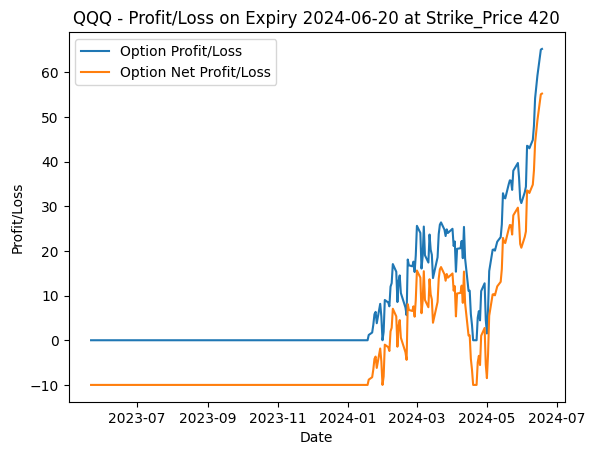

<Figure size 1800x1200 with 0 Axes>

In [8]:
plt.plot(data['Profit/Loss'], label = 'Option Profit/Loss')
plt.plot(data['Net Profit/Loss'], label = 'Option Net Profit/Loss')
plt.title('QQQ - Profit/Loss on Expiry 2024-06-20 at Strike_Price 420')
plt.xlabel('Date')
plt.ylabel('Profit/Loss')
plt.legend()
plt.figure(figsize = (18, 12))
plt.show()

### plot: comparison of intrinsic value vs stock price

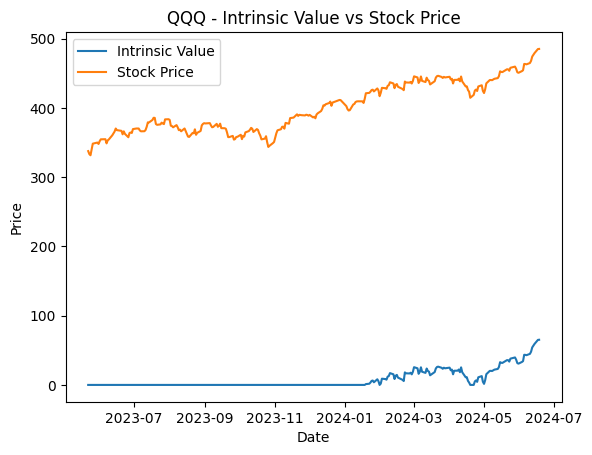

<Figure size 1800x1200 with 0 Axes>

In [27]:
plt.plot(data['Intrinsic Value'], label = "Intrinsic Value")
plt.plot(data['Close'], label = "Stock Price")
plt.title('QQQ - Intrinsic Value vs Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.figure(figsize = (18, 12))
plt.show()

### plot: in-the-money options

In [23]:
data[data['Status'] == 'In-the-money']

,Open,High,Low,Close,Adj Close,Volume,Status,Intrinsic Value,Profit/Loss,Net Profit/Loss
Date,,,,,,,,,,
2024-01-19,415.220001,421.339996,414.630005,421.179993,420.623810,70268500,In-the-money,1.179993,1.179993,-8.820007
2024-01-22,423.410004,424.730011,421.119995,421.730011,421.173096,44880600,In-the-money,1.730011,1.730011,-8.269989
2024-01-23,422.429993,423.700012,420.570007,423.480011,422.920776,33003800,In-the-money,3.480011,3.480011,-6.519989
2024-01-24,427.440002,429.850006,425.329987,425.829987,425.267670,46948000,In-the-money,5.829987,5.829987,-4.170013
2024-01-25,428.359985,429.040009,423.980011,426.350006,425.786987,44367200,In-the-money,6.350006,6.350006,-3.649994
...,...,...,...,...,...,...,...,...,...,...
2024-06-12,471.989990,476.500000,471.290009,474.149994,474.149994,34532600,In-the-money,54.149994,54.149994,44.149994
2024-06-13,477.720001,478.390015,474.420013,476.720001,476.720001,25859000,In-the-money,56.720001,56.720001,46.720001
2024-06-14,476.519989,479.260010,476.049988,479.190002,479.190002,23372600,In-the-money,59.190002,59.190002,49.190002


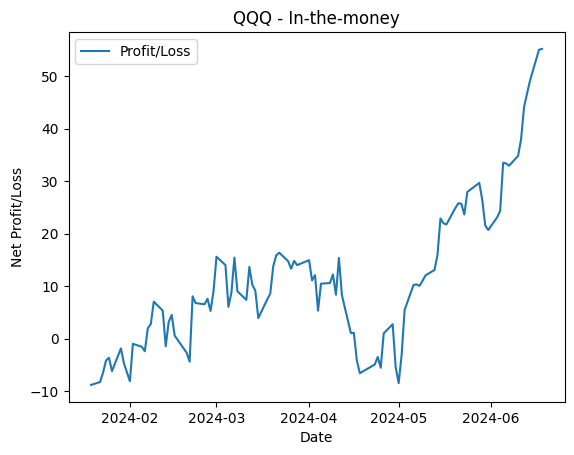

<Figure size 1800x1200 with 0 Axes>

In [11]:
plt.plot(data[data['Status'] == 'In-the-money']['Net Profit/Loss'], label = "Intrinsic Value")
plt.title('QQQ - In-the-money')
plt.xlabel('Date')
plt.ylabel('Net Profit/Loss')
plt.legend()
plt.figure(figsize = (18, 12))
plt.show()

In [10]:
print(f'Profit if Call Option was purchased on {start_date} and sold at expiry: {data["Profit/Loss"].iloc[-1]}')

Profit if Call Option was purchased on 2023-05-20 and sold at expiry: 65.20999145507812
